In [1]:
# (tf1) 가상머신에서 jupyter 실행할 것
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

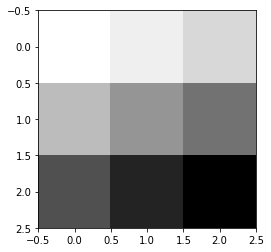

In [3]:
# 3*3*1*1 이미지 준비 

# 2*2*1 필터 준비
image = np.array([[[[1], [2], [3]],
                 [[4], [5], [6]],
                 [[7], [8], [9]]]], dtype=np.float32)


image.shape

# 이미지를 2차원크기로 보내야 한다.
# 근데 이미지는 4차원이니까 reshape으로 줄여야함
plt.imshow(image.reshape(3,3), cmap="Greys")



In [4]:
# 패딩없이  Convolution layer 추출

filter = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])

In [5]:
filter.shape

TensorShape([Dimension(2), Dimension(2), Dimension(1), Dimension(1)])

(1, 2, 2, 1)
축의 방향을 바꿈: [[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
차원 변경: [[12. 16.]
 [24. 28.]]


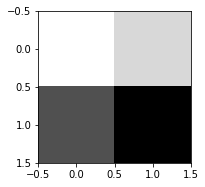

In [9]:
# Tensorflow에 conv2d   : convolution layer를 추출해주는 함수

conv2d = tf.nn.conv2d(image, filter, strides=[1,1,1,1], padding ="VALID")  
# 가로 세로 한칸씩 이동이라는 뜻
# [1,1,1,1] 에서 첫번째 네번째 1은 의미없는 자리이다 그냥 자리 채우기용

# [1,2,2,1] 이라고 하면  가로 세로로 두칸씩 이동이라는 것

sess = tf.Session()
conv2d_img = sess.run(conv2d)

print(conv2d_img.shape) # 1, 2, 2, 1로 크기가 작아짐을 알 수 있음.


# 특징을 뽑아낸 것들 그래프 
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print("축의 방향을 바꿈:", conv2d_img)
for i, one_img in enumerate(conv2d_img):
    print("차원 변경:", one_img.reshape(2, 2))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(2,2), cmap="Greys")

sess.close()

In [ ]:
## padding을 이용한 convolution layer 추출
filter = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])


conv2d = tf.nn.conv2d(image, filter, strides=[1,1,1,1], padding ="SAME")  
# padding을 SAME을 하면 같은 모양을 그대로 유지할 수 있게 한다. 


sess = tf.Session()
conv2d_img = sess.run(conv2d)

print(conv2d_img.shape) # 1, 2, 2, 1로 크기가 작아짐을 알 수 있음.


# 특징을 뽑아낸 것들 그래프 
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print("축의 방향을 바꿈:", conv2d_img)
for i, one_img in enumerate(conv2d_img):
    print("차원 변경:", one_img.reshape(2, 2))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(2,2), cmap="Greys")

sess.close()

(1, 3, 3, 3)
축의 방향을 바꿈: [[[[ 12.]
   [ 16.]
   [  9.]]

  [[ 24.]
   [ 28.]
   [ 15.]]

  [[ 15.]
   [ 17.]
   [  9.]]]


 [[[120.]
   [160.]
   [ 90.]]

  [[240.]
   [280.]
   [150.]]

  [[150.]
   [170.]
   [ 90.]]]


 [[[-12.]
   [-16.]
   [ -9.]]

  [[-24.]
   [-28.]
   [-15.]]

  [[-15.]
   [-17.]
   [ -9.]]]]
차원 변경: [[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
차원 변경: [[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
차원 변경: [[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


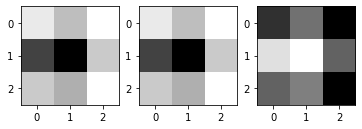

In [11]:
## 3개의 필터 사용해보기   (2*2*1*3)
## 그러면 세개의 이미지가 생성된다.


filter = tf.constant([[[[1., 10, -1]],[[1., 10, -1]]],
                      [[[1., 10, -1]],[[1., 10, -1]]]])


conv2d = tf.nn.conv2d(image, filter, strides=[1,1,1,1], padding ="SAME")  
# padding을 SAME을 하면 같은 모양을 그대로 유지할 수 있게 한다. 


sess = tf.Session()
conv2d_img = sess.run(conv2d)

print(conv2d_img.shape) # 1, 2, 2, 1로 크기가 작아짐을 알 수 있음.


# 특징을 뽑아낸 것들 그래프 
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print("축의 방향을 바꿈:", conv2d_img)
for i, one_img in enumerate(conv2d_img):
    print("차원 변경:", one_img.reshape(3, 3))
    
    #이미지가 세장이 나올것이니까 1행3열로 바꿔준다.
    plt.subplot(1, 3, i+1)
    plt.imshow(one_img.reshape(3,3), cmap="Greys")

sess.close()

    필터로 만들어진 이미지 순서대로 이다.
    패딩을 했기 때문에 사이즈가 같아짐 

In [13]:
#### Max pooling (2*2)
image2 = tf.constant([[[[4],[3]],
                     [[2], [1]]]])

# 2*2 의 커널이 만들어짐?
pool = tf.nn.max_pool(image2, ksize=[1,2,2,1], strides=[1,1,1,1], padding="VALID")  

# 세션

sess = tf.Session()
p = sess.run(pool)
print(p.shape)
print(p)


sess.close()


(1, 1, 1, 1)
[[[[4]]]]
